In [1]:
import numpy as np

x = np.asarray([580, 700, 810, 840])
y = np.asarray([374, 385, 375, 401])

In [38]:
input_count = 1
output_count = 1
R_MEAN = 0
R_STD = 1

def main_execute(x, y, lr, epoch_count):
    model_init()
    sse_row, theta_0_row, theta_1_row = run_train(x,y,epoch_count,lr)
    return sse_row, theta_0_row, theta_1_row
    


def model_init():
    global theta_0, theta_1
    theta_0 = np.random.normal(R_MEAN, R_STD, [input_count, output_count])
    theta_1 = np.random.normal(R_MEAN, R_STD, [output_count])
    
print(theta_0)
print(theta_1)

[[0.32250609]]
[-0.30170675]


In [39]:
def forward_neuralnet(input_x):
    y_hat = theta_0 + theta_1 * input_x
    return y_hat

In [40]:
def forward_postproc(output, y):
    sse = (1/2)*np.sum(np.square(output - y))
    return sse
output = np.asarray([1000,900,800,700])
forward_postproc(output, y)

463563.5

In [41]:
def forward_postproc(output, y):
    diff = output - y
    square = np.square(diff)
    sse = 1/2 * (np.sum(square))
    
    return sse

In [42]:
def back_propagation(y_hat, lr):
    global theta_0, theta_1
    theta_0 = theta_0 - lr*(np.sum(y_hat -y))
    theta_1 = theta_1 -lr*(np.sum((y_hat - y)*x))

In [43]:
def run_train(x,y,epoch_count,lr):
    print("initial theta_0:{}".format(theta_0))
    print("initial theta_1:{}".format(theta_1))
    sse_row = []
    theta_0_row = []
    theta_1_row = []
    
    for epoch in range(epoch_count):
        y_hat = forward_neuralnet(x)
        sse = forward_postproc(y_hat, y)
        sse_row.append(sse)
        
        back_propagation(y_hat, lr)
        
        theta_0_row.append(theta_0)
        theta_1_row.append(theta_1)

        print("Epoch - {}".format(epoch+1))
        print("SSE: {}".format(sse))
            
    print("==================================")
    print("Final SSE : {}".format(sse))
    
    return sse_row, theta_0_row, theta_1_row

In [44]:
sse_row, theta_0_row, theta_1_row = main_execute(x=x, y=y, lr = 0.001, epoch_count = 10)

initial theta_0:[[-0.87638111]]
initial theta_1:[-0.61109948]
Epoch - 1
SSE: 1394959.5418961295
Epoch - 2
SSE: 6650939717227.041
Epoch - 3
SSE: 3.1814261797389877e+19
Epoch - 4
SSE: 1.521810898064306e+26
Epoch - 5
SSE: 7.279466121880262e+32
Epoch - 6
SSE: 3.482076983875249e+39
Epoch - 7
SSE: 1.6656249124079917e+46
Epoch - 8
SSE: 7.967389468071344e+52
Epoch - 9
SSE: 3.811139858863078e+59
Epoch - 10
SSE: 1.8230296236956614e+66
Final SSE : 1.8230296236956614e+66


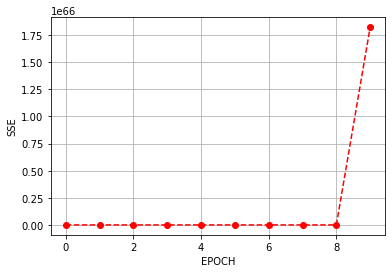

In [47]:
import matplotlib.pyplot as plt
plt.plot(sse_row, '--o', color = 'red')
plt.xlabel("EPOCH")
plt.ylabel("SSE")
plt.grid()
plt.show()